# GROUP6 Ting-ZHU

## Topic

This topic is about economy and society.
And I choose two variable to set up a question: is crude birth rate related to female employment rate in USA?
So the endogenous variable is crude birth rate(CBR) and the exogenous variavle is female employment rate.

Secondly, I add one more variable to this model, which is CPI.
And then, set up a multiple regressions model.

## Data

In [5]:
import pandas as pd
data = pd.read_csv('Group6_Ting-ZHU_CBR-Female.employment.csv')
data.head()

,t,CBR,femalemp,CPI
0,1960,2.37,40.7,0.1356
1,1961,2.33,40.6,0.1371
2,1962,2.24,41.2,0.1387
3,1963,2.17,41.9,0.1404
4,1964,2.11,42.3,0.1422


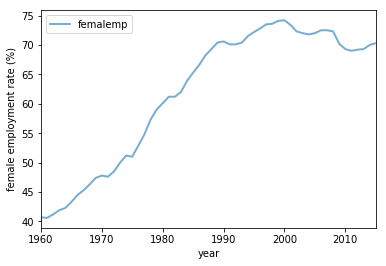

In [6]:
import matplotlib.pyplot as plt
data.plot(x='t', y='femalemp', alpha=0.6, linewidth=2)
plt.ylabel('female employment rate (%)')
plt.xlabel('year')

plt.show()

From this plot, it shows the female employment rate in US from 1960 to 2015.

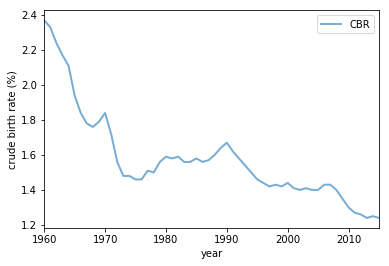

In [7]:
data.plot(x='t', y='CBR', alpha=0.6, linewidth=2)
plt.ylabel('crude birth rate (%)')
plt.xlabel('year')

plt.show()

This plot shows the crude birth rate in US from 1960 to 2015.

### hypothesis:
The crude birth rate(CBR) and the female employment rate in USA may have negative relationship. The rise in the female employment rate may cause a decline in crude birth rate.

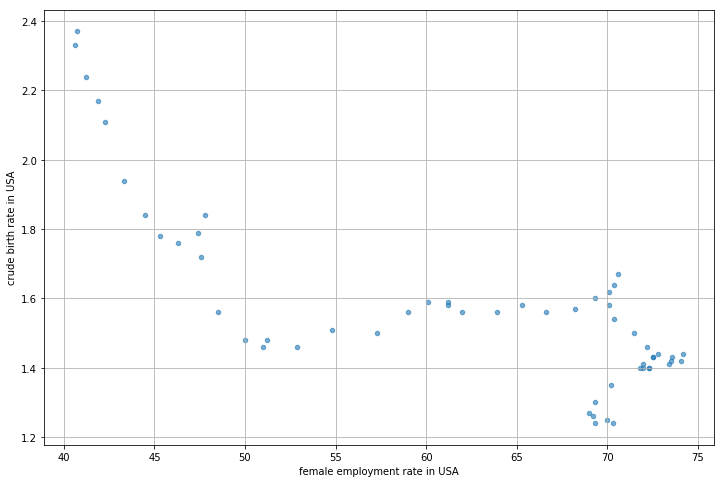

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data.plot(x='femalemp', y='CBR', kind='scatter', alpha=0.6, figsize=(12, 8))
plt.ylabel('crude birth rate in USA')
plt.xlabel('female employment rate in USA')

plt.grid()
plt.show()

This scatter diagram above show the interesting negative relationship between CBR and female employment rate.

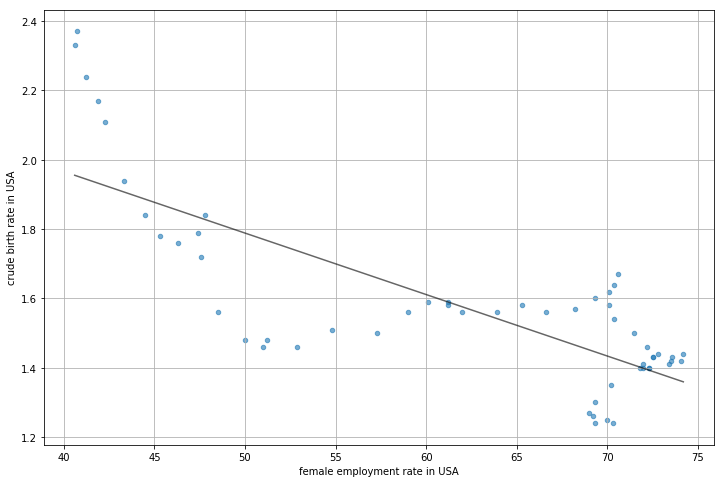

In [11]:
data.plot(x='femalemp', y='CBR', kind='scatter', alpha=0.6, figsize=(12, 8))
plt.ylabel('crude birth rate in USA')
plt.xlabel('female employment rate in USA')

plt.plot(np.unique(data['femalemp']),
         np.poly1d(np.polyfit(data['femalemp'], data['CBR'], 1))(np.unique(data['femalemp'])),
         color='black', alpha=0.6)

plt.grid()
plt.show()

#### linear regression model

 $$
y_t = \beta_0 + \beta_1 x_t + u_t \\
cbr_t = \beta_0 + \beta_1 femalemp_t + u_t
$$

* $\beta_0$ is the constant term
* $\beta_1$ is the slope term
* $u_t$ is the error term


In [12]:
data['constant'] = 1

In [13]:
import statsmodels.api as sm

reg = sm.OLS(endog=data['CBR'], exog=data[['constant', 'femalemp']], missing='drop')

C:\Users\00\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [14]:
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CBR   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     83.81
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           1.42e-12
Time:                        21:10:53   Log-Likelihood:                 22.356
No. Observations:                  56   AIC:                            -40.71
Df Residuals:                      54   BIC:                            -36.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       2.6751      0.122     21.978      0.0

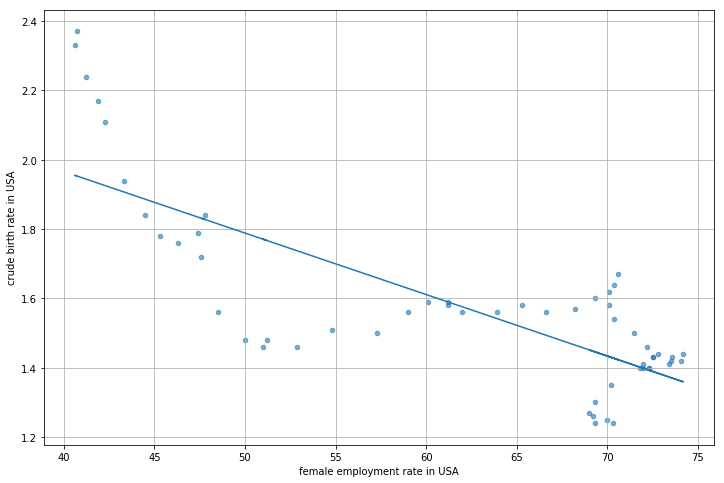

In [15]:
data.plot(x='femalemp', y='CBR', kind='scatter', alpha=0.6, figsize=(12, 8))
plt.ylabel('crude birth rate in USA')
plt.xlabel('female employment rate in USA')

plt.plot(data['femalemp'], results.predict())

plt.grid()
plt.show()

## The result shows:
    - The CDR and femalemp have negative relationship, with negative valus of coefficient of femalemp.
    - The relationship is statistically significant, with P values is smaller than 0.05.
    - A moderate amount of variance in cbr can be explained by variance in femalemp(R-squared=0.608).
    - The plot do reveal the relationship between the CDR and femalemp.

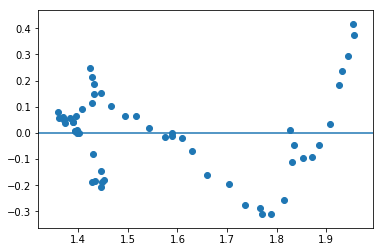

In [16]:
plt.scatter(results.predict(), results.resid)
plt.axhline()
plt.show()

In [17]:
results = reg.fit(cov_type='HC0')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CBR   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     54.34
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           1.03e-09
Time:                        21:11:16   Log-Likelihood:                 22.356
No. Observations:                  56   AIC:                            -40.71
Df Residuals:                      54   BIC:                            -36.66
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
constant       2.6751      0.162     16.532      0.0

## multiple regression

Add one more variable which might influence the birth rate.
So I add consumer price index(CPI) in this model, in which the CPI would affect the costs of raising children,and then affect the birth rate. 

multiple regressions model:
 $$
y_t = \beta_0 + \beta_1 x_1t + \beta_2 x_2t + u_t \\
cbr_t = \beta_0 + \beta_1 femalemp_t + \beta_2 CPI_t + u_t
$$

* $\beta_0$ is the constant term
* $\beta_1$ is the slope term of $ femalemp_t $
* $\beta_1$ is the slope term of CPI
* $u_t$ is the error term


### Hypothesis:
CBR and the female employment rate in USA may have negative relationship. The rise in the female employment rate may cause a decline in crude birth rate.
CBR and CPI in USA may have negative relationship. The rise in CPI may cause a decline in crude birth rate.

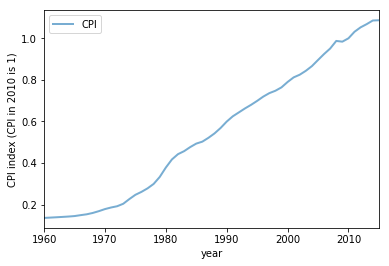

In [18]:
data.plot(x='t', y='CPI', alpha=0.6, linewidth=2)
plt.ylabel('CPI index (CPI in 2010 is 1)')
plt.xlabel('year')

plt.show()

From this plot, it shows the CPI in US from 1960 to 2015.

In [19]:
reg_2 = sm.OLS(endog=data['CBR'], 
               exog=data[['constant','femalemp','CPI']], 
               missing='drop')
results_2 = reg_2.fit(cov_type='HC0')
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    CBR   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     39.60
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           3.03e-11
Time:                        21:12:11   Log-Likelihood:                 24.067
No. Observations:                  56   AIC:                            -42.13
Df Residuals:                      53   BIC:                            -36.06
Df Model:                           2                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
constant       2.4113      0.234     10.296      0.0

## The result shows:
    - The CDR and femalemp have negative relationship, with negative valus of coefficient of femalemp.
    - The CDR and CPI alse have negative relationship, with negative valus of coefficient of CPI.
    - The relationship is statistically significant, with P values is smaller than 0.05.
    - A moderate amount of variance in cbr can be explained by variance in femalemp(R-squared=0.631)
